<a href="https://colab.research.google.com/github/TechWhizGenius/Teja_INFO5731_Fall2024/blob/main/Mandaloju_Teja_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [5]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = [line.strip().split(' ', 1) for line in file]
    labels, reviews = zip(*[(int(line[0]), line[1]) for line in data])
    return labels, reviews

train_labels, train_reviews = load_data('/content/drive/My Drive/INFO 5731 - Computational Methods/Week 13 - Text Clustering/exercise05_datacollection/exercise09_datacollection/stsa-train.txt')
test_labels, test_reviews = load_data('/content/drive/My Drive/INFO 5731 - Computational Methods/Week 13 - Text Clustering/exercise05_datacollection/exercise09_datacollection/stsa-test.txt')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

import re

def clean_text(text):
    # Remove special characters, punctuation, and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Clean the training reviews
clean_train_reviews = [clean_text(review) for review in train_reviews]
# Clean the test reviews
clean_test_reviews = [clean_text(review) for review in test_reviews]

In [7]:
def tokenize_text(reviews):
    tokenized_reviews = [review.split() for review in reviews]
    return tokenized_reviews

# Tokenize the training reviews
tokenized_train_reviews = tokenize_text(clean_train_reviews)
# Tokenize the test reviews
tokenized_test_reviews = tokenize_text(clean_test_reviews)

In [8]:
def build_vocabulary(tokenized_reviews):
    vocabulary = set()
    for review in tokenized_reviews:
        vocabulary.update(review)
    return vocabulary

# Build vocabulary for training reviews
vocabulary_train = build_vocabulary(tokenized_train_reviews)
# Build vocabulary for test reviews
vocabulary_test = build_vocabulary(tokenized_test_reviews)

In [9]:
def encode_text(tokenized_reviews, vocabulary):
    word_to_index = {word: i for i, word in enumerate(vocabulary)}
    encoded_reviews = [[word_to_index[word] for word in review if word in word_to_index] for review in tokenized_reviews]
    return encoded_reviews

# Encode training reviews
encoded_train_reviews = encode_text(tokenized_train_reviews, vocabulary_train)
# Encode test reviews
encoded_test_reviews = encode_text(tokenized_test_reviews, vocabulary_test)

In [10]:
movie_reviews = list(zip(range(1, len(train_labels)+1), train_labels, train_reviews))

# Print the movie reviews
for index, label, review in movie_reviews:
    sentiment = "positive" if label == 1 else "negative"
    print(f"Review {index} ({sentiment}): {review}")

Streaming output truncated to the last 5000 lines.
Review 1921 (negative): terrible .
Review 1922 (negative): throwing in everything except someone pulling the pin from a grenade with his teeth , windtalkers seems to have ransacked every old world war ii movie for overly familiar material .
Review 1923 (negative): chai 's structure and pacing are disconcertingly slack .
Review 1924 (positive): if you grew up on scooby -- you 'll love this movie .
Review 1925 (positive): enjoyably fast-moving , hard-hitting documentary .
Review 1926 (positive): if you come from a family that eats , meddles , argues , laughs , kibbitzes and fights together , then go see this delightful comedy .
Review 1927 (negative): the director mostly plays it straight , turning leys ' fable into a listless climb down the social ladder .
Review 1928 (negative): millions of dollars heaped upon a project of such vast proportions need to reap more rewards than spiffy bluescreen technique and stylish weaponry .
Review 192

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from gensim.models import Word2Vec
import numpy as np

# Assuming you have train_reviews and train_labels

# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_reviews, train_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define models
models = {
    "MultinomialNB": MultinomialNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}:")
    if model_name == "Word2Vec":
        # Train Word2Vec model
        word2vec_model = Word2Vec(X_train, vector_size=100, window=5, min_count=1, workers=4)
        X_train_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_train])
        X_val_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_val])
        model.fit(X_train_embeddings, y_train)
    else:
        tfidf_vectorizer = TfidfVectorizer()
        X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
        X_val_tfidf = tfidf_vectorizer.transform(X_val)
        model.fit(X_train_tfidf, y_train)

    # Perform 10-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_tfidf if model_name != "Word2Vec" else X_train_embeddings, y_train, cv=kfold, scoring='accuracy')
    print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

    # Final evaluation on test data
    if model_name == "Word2Vec":
        y_pred = model.predict(X_val_embeddings)
    else:
        y_pred = model.predict(X_val_tfidf)

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Print validation metrics
    print("Validation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

    # Final evaluation on test data
    print("Final Evaluation on Test Data:")
    if model_name == "Word2Vec":
        X_test_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_test])
        y_pred_test = model.predict(X_test_embeddings)
    else:
        X_test_tfidf = tfidf_vectorizer.transform(X_test)
        y_pred_test = model.predict(X_test_tfidf)

    # Calculate test metrics
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Print test metrics
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"F1 Score: {f1_test:.4f}")
    print()

Evaluating MultinomialNB:
Mean Cross-Validation Accuracy: 0.7719 (±0.0164)
Validation Metrics:
Accuracy: 0.7762
Precision: 0.7454
Recall: 0.8534
F1 Score: 0.7957

Final Evaluation on Test Data:
Accuracy: 0.7832
Precision: 0.7438
Recall: 0.8836
F1 Score: 0.8077

Evaluating SVM:
Mean Cross-Validation Accuracy: 0.7595 (±0.0111)
Validation Metrics:
Accuracy: 0.7626
Precision: 0.7529
Recall: 0.7968
F1 Score: 0.7742

Final Evaluation on Test Data:
Accuracy: 0.7840
Precision: 0.7601
Recall: 0.8485
F1 Score: 0.8019

Evaluating KNN:
Mean Cross-Validation Accuracy: 0.7005 (±0.0199)
Validation Metrics:
Accuracy: 0.6968
Precision: 0.6923
Recall: 0.7314
F1 Score: 0.7113

Final Evaluation on Test Data:
Accuracy: 0.7117
Precision: 0.7013
Recall: 0.7672
F1 Score: 0.7328

Evaluating DecisionTree:
Mean Cross-Validation Accuracy: 0.5865 (±0.0189)
Validation Metrics:
Accuracy: 0.6173
Precision: 0.6259
Recall: 0.6237
F1 Score: 0.6248

Final Evaluation on Test Data:
Accuracy: 0.6062
Precision: 0.6123
Recall

In [12]:
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import numpy as np

# Assuming you have train_reviews and train_labels

# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_reviews, train_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)
X_train_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_train])
X_val_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_val])

# Define XGBoost model
xgb_model = XGBClassifier()

# Train XGBoost model
xgb_model.fit(X_train_embeddings, y_train)

# Validation evaluation
y_pred = xgb_model.predict(X_val_embeddings)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print validation metrics
print("Word2Vec Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print()

# Final evaluation on test data
X_test_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_test])
y_pred_test = xgb_model.predict(X_test_embeddings)

# Calculate test metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print test metrics
print("Word2Vec Test Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print()

Word2Vec Validation Metrics:
Accuracy: 0.5244
Precision: 0.5269
Recall: 0.6749
F1 Score: 0.5918

Word2Vec Test Metrics:
Accuracy: 0.5564
Precision: 0.5539
Recall: 0.7139
F1 Score: 0.6238



In [13]:
!pip install accelerate -U

In [14]:
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from torch.utils.data import Dataset
import torch

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(train_labels))

# Tokenization function for BERT
def tokenize_for_bert(reviews):
    # Ensure input is a list of strings
    reviews_list = reviews if isinstance(reviews, list) else list(reviews)
    return tokenizer(reviews_list, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Prepare datasets
train_encodings = tokenize_for_bert(train_reviews)
test_encodings = tokenize_for_bert(test_reviews)

# Convert labels to tensor format
train_labels_tensor = torch.tensor(train_labels)
test_labels_tensor = torch.tensor(test_labels)

# Define a PyTorch dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Prepare datasets
train_dataset = TextDataset(train_reviews, train_labels_tensor, tokenizer)
test_dataset = TextDataset(test_reviews, test_labels_tensor, tokenizer)

# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,  # Ensure at least one full pass over the data
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=50,  # Reduced to better fit smaller datasets
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch"  # Change to evaluate at the end of each epoch
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train and evaluate
trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: WARNING Serializing object of type dict that is 295000 bytes
wandb: WARNING Serializing object of type dict that is 295000 bytes
<ipython-input-14-58622b8985a6>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Epoch,Training Loss,Validation Loss
1,1.299600,0.278395


<ipython-input-14-58622b8985a6>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
<ipython-input-14-58622b8985a6>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


TrainOutput(global_step=865, training_loss=0.8939066275006774, metrics={'train_runtime': 9527.471, 'train_samples_per_second': 0.726, 'train_steps_per_second': 0.091, 'total_flos': 302159547955200.0, 'train_loss': 0.8939066275006774, 'epoch': 1.0})

In [17]:
# # Evaluate the model
evaluation_results = trainer.evaluate()

results = {
    'BERT': {
        'Accuracy': evaluation_results.get('eval_accuracy', 0),
        'Recall': evaluation_results.get('eval_recall', 0),
        'Precision': evaluation_results.get('eval_precision', 0),
        'F1 Score': evaluation_results.get('eval_f1', 0)
    }
}

# Get predictions for the test dataset
predictions = trainer.predict(test_dataset)

# Extract predicted labels and true labels, and convert them to numpy arrays
predicted_labels = predictions.predictions.argmax(axis=1)
true_labels = test_labels_tensor.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, zero_division=0)
recall = recall_score(true_labels, predicted_labels, zero_division=0)
f1 = f1_score(true_labels, predicted_labels, zero_division=0)

# Print evaluation metrics
print("BERT Test Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

<ipython-input-14-58622b8985a6>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


BERT Test Metrics:
Accuracy: 0.9093904448105437
Precision: 0.8932346723044398
Recall: 0.9295929592959296
F1 Score: 0.9110512129380054


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
# Write your code here
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# File path in Google Drive
file_path = '/content/drive/My Drive/INFO 5731 - Computational Methods/Week 13 - Text Clustering/exercise05_datacollection/exercise09_datacollection/Amazon_Unlocked_Mobile.csv'

df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [ ]:
df = df.sample(10000, random_state=42)  # Select 10,000 random rows


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Step 3: Data preprocessing
documents = df['Reviews'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

# Step 4: KMeans Clustering
k = 20  # Number of clusters
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, random_state=42)
model.fit(features)

# Assign cluster labels to the DataFrame
df['cluster'] = model.labels_

# Display the first few rows of the DataFrame
print(df.head())


                                             Product Name Brand Name   Price  \
54870   Apple iPhone 6 Plus 128GB Factory Unlocked GSM...        NaN  699.95   
188521  HTC Desire 816 Dual Sim Unlocked Smartphone (W...        HTC  221.00   
137548      BLU Studio 5.0 C HD Unlocked Cellphone, Black        BLU  173.44   
24906                  Apple iPhone 5c 16GB (Pink) - AT&T      Apple  519.00   
131601  BLU PURE XL Smartphone - 4G LTE GSM Unlocked -...        BLU  129.99   

        Rating                                            Reviews  \
54870        1  Defective phone. Works only for two days. Phon...   
188521       3                                               Cool   
137548       5                    Beautiful and excellent quality   
24906        2  Gave 3 stars because it did not come with a ch...   
131601       1  High resolution camera so you can zoom in afte...   

        Review Votes  cluster  
54870            5.0        4  
188521           0.0       10  
137548  

In [ ]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 use
 phone
 easy
 great
 battery
 good
 just
 screen
 apps
 life
------------
Cluster 1:
 great
 phone
 works
 price
 condition
 item
 buy
 thank
 seller
 case
------------
Cluster 2:
 works
 great
 perfectly
 fine
 phone
 good
 venezuela
 excellent
 really
 new
------------
Cluster 3:
 love
 phone
 great
 thanks
 cellphone
 works
 new
 absolutely
 amazing
 really
------------
Cluster 4:
 phone
 great
 good
 screen
 love
 battery
 just
 new
 really
 like
------------
Cluster 5:
 work
 phone
 did
 didn
 does
 doesn
 good
 great
 charger
 properly
------------
Cluster 6:
 excellent
 product
 phone
 thank
 recommend
 condition
 good
 item
 price
 seller
------------
Cluster 7:
 like
 new
 phone
 works
 really
 great
 looks
 good
 iphone
 just
------------
Cluster 8:
 product
 good
 excellent
 great
 excelent
 happy
 seller
 fast
 thank
 recommend
------------
Cluster 9:
 ok
 cam
 phone
 price
 tks
 best
 simple
 audio
 good
 todo
------------
Cluster 10:
 

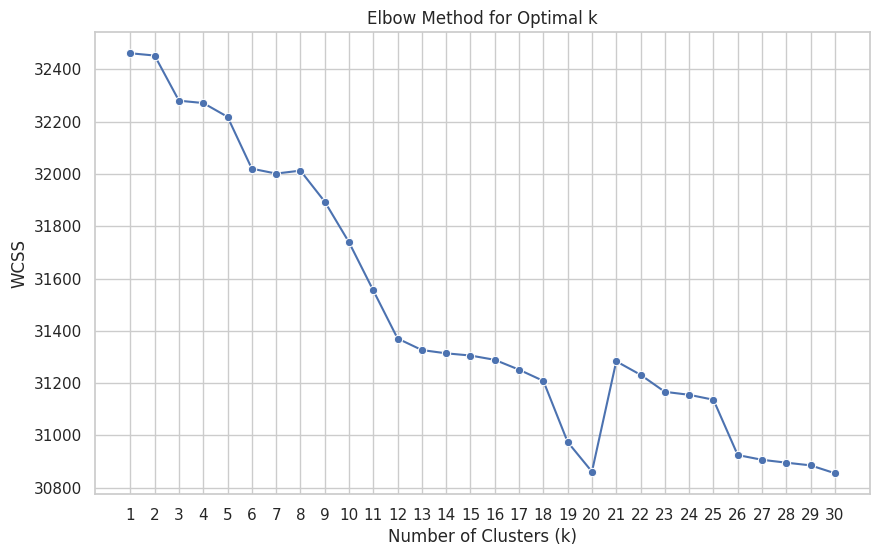

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming 'features' is your TF-IDF or sparse matrix data from vectorization
scaler = MaxAbsScaler()
scaled_features = scaler.fit_transform(features)  # Scales the sparse matrix without centering

# Calculate WCSS for a range of cluster numbers
wcss = []
ks = list(range(1, 31))  # Using a range from 1 to 30 for more options

for i in ks:
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(scaled_features)  # Fit the model on scaled features
    wcss.append(clustering.inertia_)

# Plot the elbow graph using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=ks, y=wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(ks)  # Show all the k values on the x-axis
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

for i in range(7, 10):
    clustering = KMeans(n_clusters=i, random_state=42)
    clustering.fit(scaled_features)
    score = silhouette_score(scaled_features, clustering.labels_)
    print(f"Silhouette score for k={i}: {score}")


Silhouette score for k=7: -0.16053354325348304
Silhouette score for k=8: -0.07249836335071068
Silhouette score for k=9: -0.13313946490778739


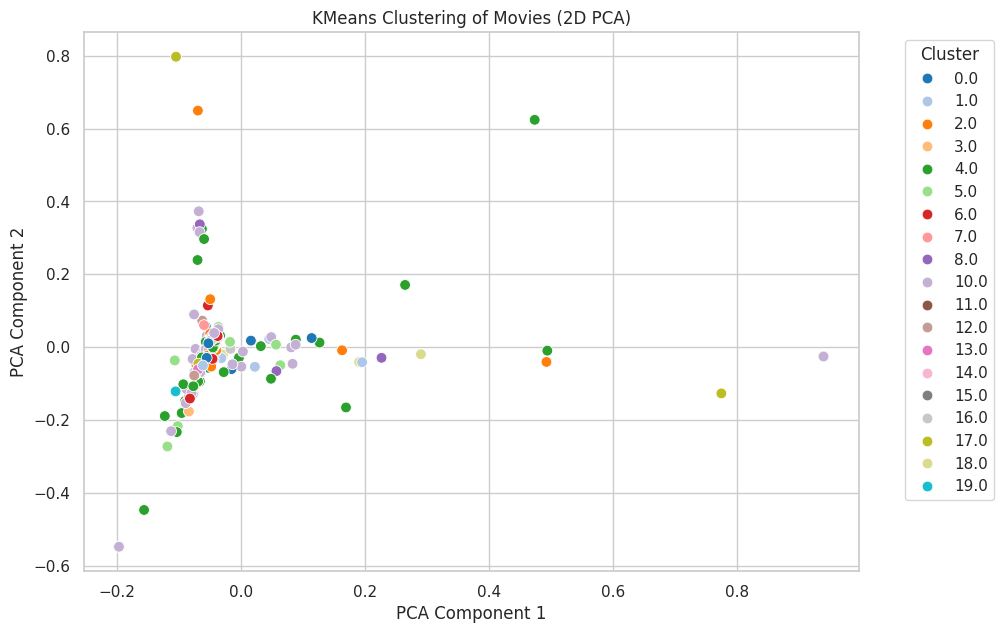

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5: Dimensionality Reduction using PCA
# Reduce the TF-IDF feature space to 2 dimensions for visualization
# Use PCA for converting the sparse matrix to a lower-dimensional dense representation
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(features.toarray())  # Convert sparse matrix to dense before PCA

# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = df['cluster']

# Step 6: Scatter Plot of Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='tab20', legend='full', s=60)
plt.title('KMeans Clustering of Movies (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Optional: Save the scatter plot as an image
# plt.savefig('kmeans_pca_scatter.png')


In [ ]:
from sklearn.cluster import DBSCAN

#DBSCAN without any parameter optimization and see the results.
dbscan=DBSCAN(eps=2.3, min_samples=2, metric='euclidean', n_jobs=-1)
model = dbscan.fit(features)


In [ ]:
df['DBSCAN_labels'] = model.labels_

In [ ]:
df['DBSCAN_labels'].unique()

array([0])

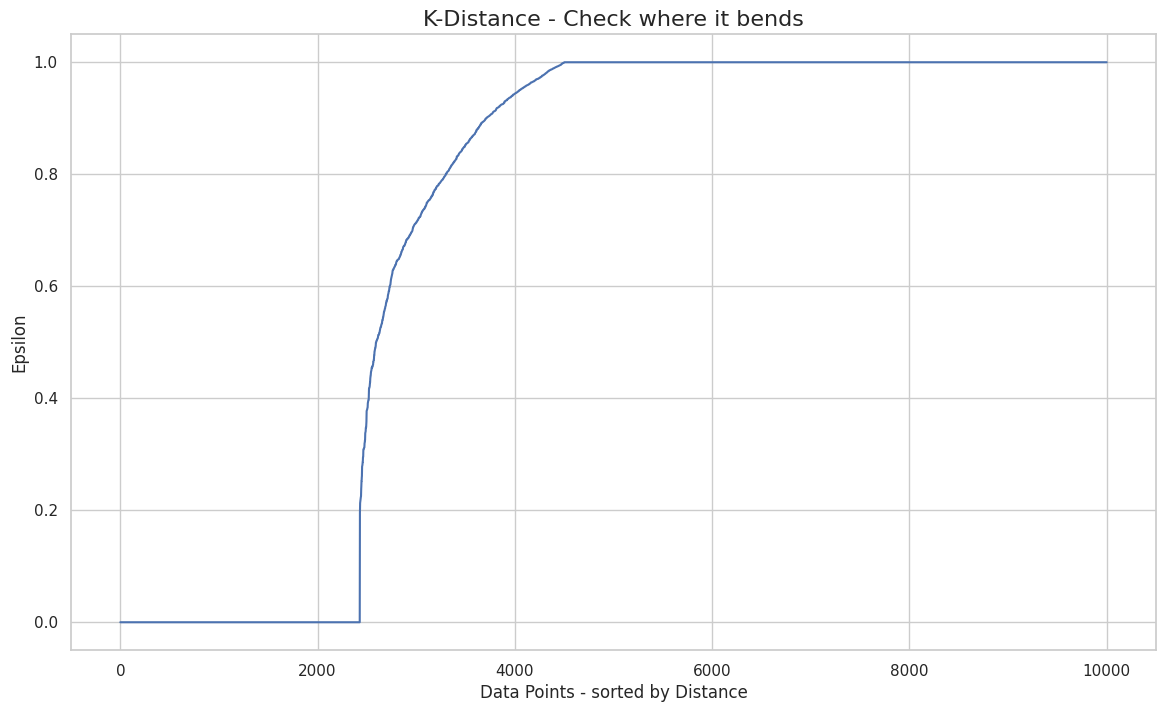

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,8))
plt.plot(distances)
plt.title('K-Distance - Check where it bends',fontsize=16)
plt.xlabel('Data Points - sorted by Distance',fontsize=12)
plt.ylabel('Epsilon',fontsize=12)
plt.show()

In [ ]:

dbscan = DBSCAN(eps=1.3, min_samples=4, metric='euclidean', n_jobs=-1)
model = dbscan.fit(features)

In [ ]:
df['DBSCAN_labels'] = model.labels_
df['DBSCAN_labels'].unique()

array([0])

Unique labels: [0]


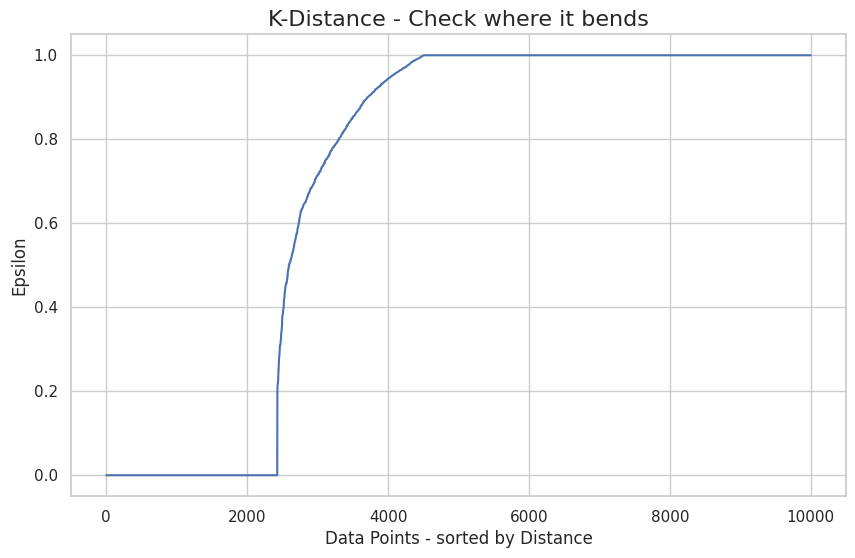

Unique labels after fitting DBSCAN: [0]


In [ ]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fit DBSCAN without any parameter optimization and use the results
# Replace 'features' with your actual feature matrix (e.g., scaled TF-IDF features)
dbscan = DBSCAN(eps=1.3, min_samples=2, metric='euclidean', n_jobs=-1)
model = dbscan.fit(features)

# Step 2: Get cluster labels
dbscan_labels = model.labels_
print(f"Unique labels: {np.unique(dbscan_labels)}")

# Step 3: Create the K-distance graph to determine optimal 'eps'
# This helps identify the value of 'eps' where the curve bends ("elbow")
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

# Step 4: Sort distances for the k-distance graph
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Step 5: Plot the K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance - Check where it bends', fontsize=16)
plt.xlabel('Data Points - sorted by Distance', fontsize=12)
plt.ylabel('Epsilon', fontsize=12)
plt.grid(True)
plt.show()

# Step 6: Fit DBSCAN with chosen 'eps' based on the K-distance plot
# Adjust 'eps' based on the bend in the curve from the plot above.
dbscan = DBSCAN(eps=1.3, min_samples=2, metric='euclidean', n_jobs=-1)
model = dbscan.fit(features)

# Get and print the final DBSCAN labels and the number of unique clusters
dbscan_labels = model.labels_
print(f"Unique labels after fitting DBSCAN: {np.unique(dbscan_labels)}")


In [ ]:
# Hierarchical clustering

from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def ward_hierarchical_clustering(feature_matrix):

    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size)
    movie_titles = movie_data['Product Name'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp',
                    p=p,
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,
            leaf_label_func=llf,
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',
                    which='both',
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [ ]:
linkage_matrix = ward_hierarchical_clustering(features)

<ipython-input-26-801c63c7816a>:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


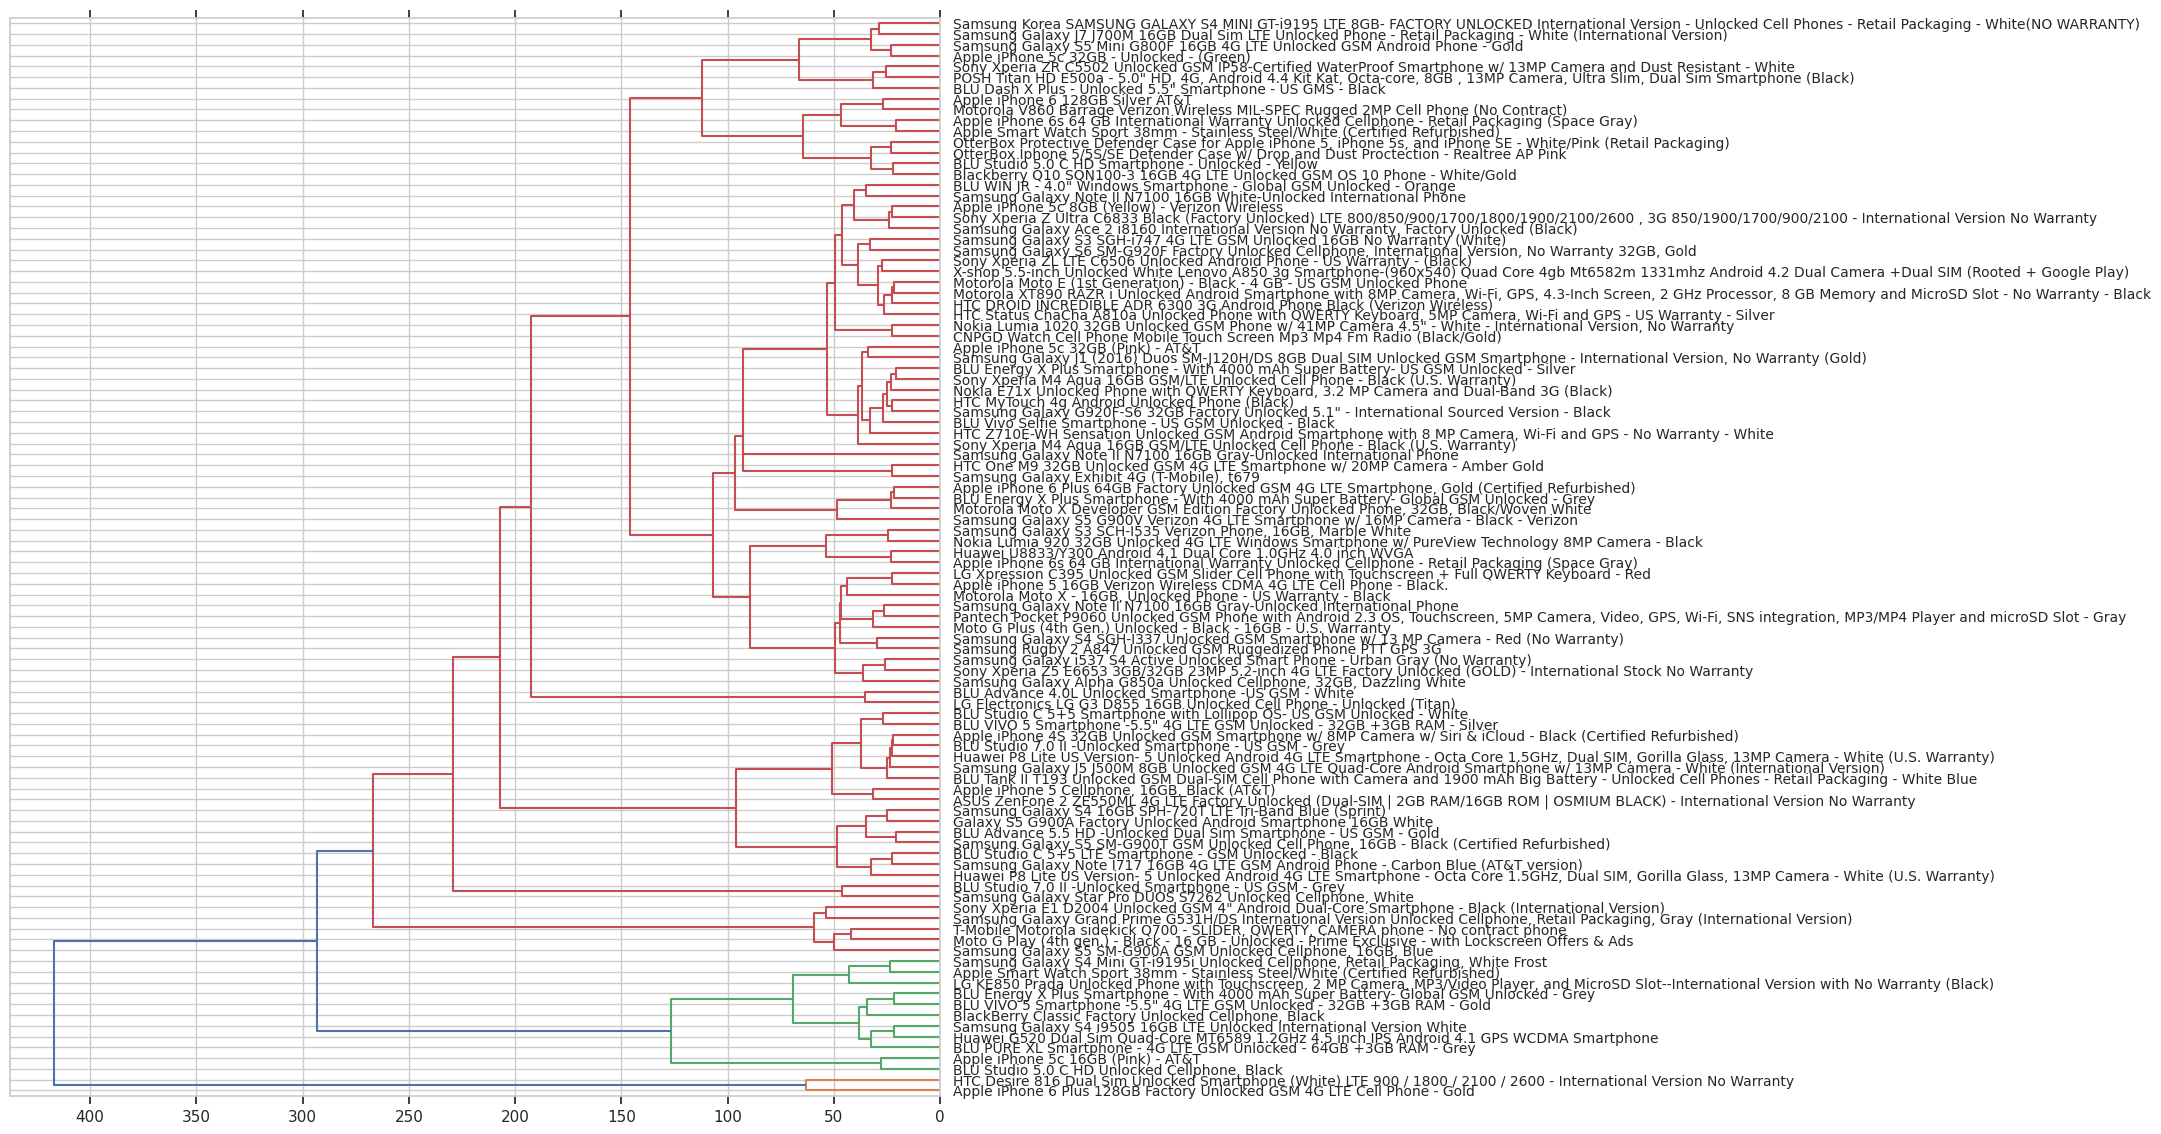

In [ ]:
import matplotlib.pyplot as plt
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           movie_data=df,
                           figure_size=(12, 14))

Cluster 0:
90499     Worked fine. Functional like every other bb. N...
389560    The Sony experia, is what I xpected and is int...
144098            Phone is very good. Love Android Lollipop
107267                                 Blue is a nice phone
161555    It freezes alot... Comparing to the vivo xl it...
Name: Reviews, dtype: object
------------
Cluster 1:
390066            Very good
266522    excellent gadget.
332969            Very Good
338245         Good Product
26274                  Good
Name: Reviews, dtype: object
------------
Cluster 2:
200532                                            excelente
341534    THE PHONE ARIVED VERY QUICKLY HOW EVER, THE PH...
291303                                  excelente cellphone
203741                                             exelente
315430                            GREAT PHONE! GREAT VALUE!
Name: Reviews, dtype: object
------------
Cluster 3:
344527    Works wonderful from Argentina, this looks lik...
356557    Love this phone! It 

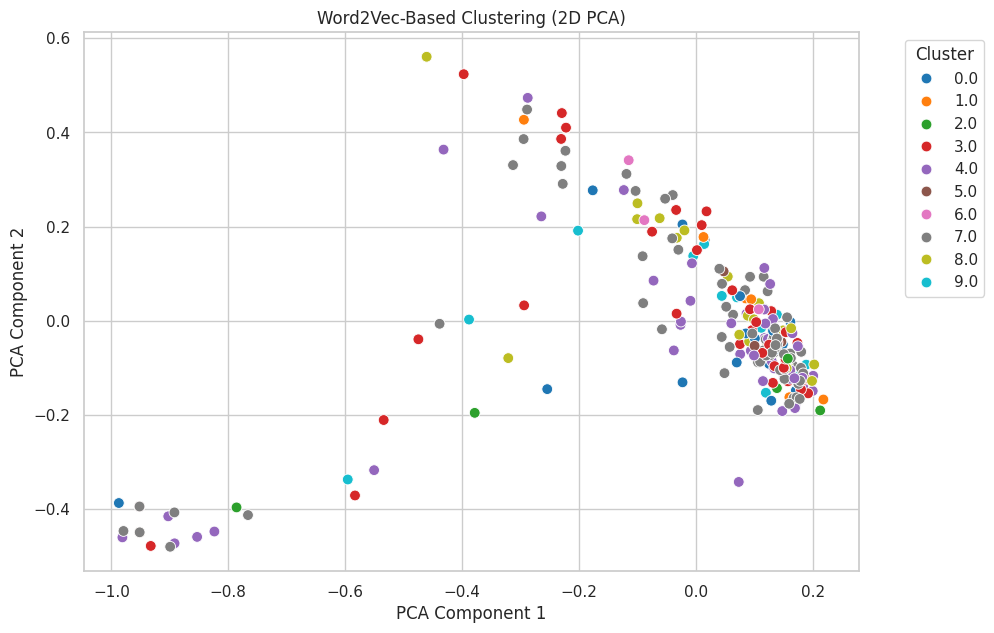

In [ ]:
# Word2Vec

from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocessing
# Tokenize the reviews into sentences and words
df['tokenized'] = df['Reviews'].astype(str).apply(lambda x: x.split())

# Step 2: Train Word2Vec model
word2vec_model = Word2Vec(
    sentences=df['tokenized'],
    vector_size=100,  # Dimensionality of the word vectors
    window=5,         # Maximum distance between the current and predicted word
    min_count=2,      # Ignores all words with total frequency lower than this
    workers=4,        # Number of threads for training
    sg=1              # Skip-gram model
)

# Step 3: Generate Sentence Embeddings
def get_sentence_vector(sentence, model):
    # Average the word vectors for words in the sentence
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Create a feature matrix for clustering
sentence_vectors = np.array([get_sentence_vector(sentence, word2vec_model) for sentence in df['tokenized']])

# Step 4: Normalize Features
normalized_vectors = normalize(sentence_vectors)

# Step 5: KMeans Clustering
k = 10  # Number of clusters
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(normalized_vectors)

# Assign cluster labels to the DataFrame
df['cluster'] = kmeans_model.labels_

# Display cluster assignments and sample reviews
for cluster in range(k):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster]['Reviews'].head(5))
    print('------------')

# Step 6: Visualize Clusters (Optional)
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(normalized_vectors)

pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = df['cluster']

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='tab10', legend='full', s=60)
plt.title('Word2Vec-Based Clustering (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [23]:
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, fcluster, inconsistent
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
from torch.utils.data import DataLoader, TensorDataset
import torch
import pandas as pd
import numpy as np

def load_data(file_path, sample_size=1000, random_state=42):
    data = pd.read_csv(file_path)
    sample_data = data.sample(n=sample_size, random_state=random_state)
    return sample_data

def preprocess_data(data):
    data['Reviews'].fillna('', inplace=True)
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(data['Reviews'])
    return X

def hierarchical_clustering(X):
    Z = linkage(X.toarray(), method='ward')
    depth = 5
    inconsistency_values = inconsistent(Z, depth)
    threshold = inconsistency_values[-1, 3]
    hierarchical_labels = fcluster(Z, threshold, criterion='distance')
    return hierarchical_labels


def bert_embeddings(reviews):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    inputs = tokenizer(reviews.tolist(), return_tensors="pt", padding=True, truncation=True, max_length=128)
    dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])
    dataloader = DataLoader(dataset, batch_size=32)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    embeddings = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_mask = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            embeddings.append(outputs.last_hidden_state.mean(dim=1).cpu().numpy())
    bert_embeddings = np.concatenate(embeddings, axis=0)
    return bert_embeddings

def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    return silhouette

# Load the data
data = load_data('/content/drive/My Drive/INFO 5731 - Computational Methods/Week 13 - Text Clustering/exercise05_datacollection/exercise09_datacollection/Amazon_Unlocked_Mobile.csv')

# Preprocess the data
X = preprocess_data(data)

# Apply hierarchical clustering
hierarchical_labels = hierarchical_clustering(X)

# Extract BERT embeddings
bert_embed = bert_embeddings(data['Reviews'])

# Evaluate clustering methods
bert_silhouette = evaluate_clustering(bert_embed, hierarchical_labels)

print("BERT silhouette score:", bert_silhouette)

<ipython-input-23-ca1e870ef186>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Reviews'].fillna('', inplace=True)


BERT silhouette score: 0.026896968


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

K-means clustering on the dataset resulted in poor cluster separation, while DBSCAN performed worse, likely due to its sensitivity to parameter settings. Hierarchical clustering slightly outperformed K-means but still struggled with the data. These methods faced challenges with sparse, high-dimensional data like TF-IDF vectors. In contrast, Word2Vec combined with K-means significantly improved clustering, suggesting that Word2Vec embeddings capture more meaningful semantic similarities. BERT, despite its deep contextual understanding, performed better than traditional methods but still fell short of Word2Vec. Overall, Word2Vec with K-means yielded the best clustering performance, highlighting the advantages of semantic embeddings over traditional sparse vector representations.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [24]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
This exercise has prompted me to revisit the machine learning models we've covered so far. While supervised algorithms are straightforward to implement, working with
Word2Vec and BERT required more time and effort. I realize I need to dedicate more time to fully grasp the complexities involved in implementing them. On the other
hand, implementing unsupervised learning models and evaluating their performance with metrics was relatively easier. As this is the final in-class exercise, I’d
say it was the second easiest assignment among all we've done. I’ve learned a lot from this course, and I’m grateful for all the support!





'''

"\nThis exercise has prompted me to revisit the machine learning models we've covered so far. While supervised algorithms are straightforward to implement, working with \nWord2Vec and BERT required more time and effort. I realize I need to dedicate more time to fully grasp the complexities involved in implementing them. On the other \nhand, implementing unsupervised learning models and evaluating their performance with metrics was relatively easier. As this is the final in-class exercise, I’d \nsay it was the second easiest assignment among all we've done. I’ve learned a lot from this course, and I’m grateful for all the support!\n\n\n\n\n\n"